In [1]:
import h5py
import textwrap
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
def lat_wrap(rad):
    return np.pi/2 - np.abs(rad - np.pi/2)

def lon_wrap(rad):
    return rad%(2*np.pi) - 2*np.pi*(rad%(2*np.pi)//np.pi)

def sky_plot_data(file, add_ver_bins):
    lat, lon, f = [], [], []
    for temp in h5py.File(file)['data'].values():
        lon.append(lon_wrap(temp['lon'][()]))
        lat.append(lat_wrap(temp['lat'][()]))
        ind = np.argmax(temp['toplist']['rho_ave'][:])
        f.append(temp['toplist']['f'][:][ind])
    sim_lon = np.unique(lon)
    sim_lat = np.unique(lat)
    sim_f = np.empty((len(sim_lat), len(sim_lon)))
    sim_f[:] = np.nan
    lon_ind = dict(zip(sim_lon, np.arange(len(sim_lon))))
    lat_ind = dict(zip(sim_lat, np.arange(len(sim_lat))))
    for ii, freq in enumerate(f):
        sim_f[lat_ind[lat[ii]], lon_ind[lon[ii]]] = 1e3*freq
    sim = {'lon': sim_lon, 'lat': sim_lat, 'f': sim_f}
    ver_lon, ver_lat, ver_f = None, None, None
    if add_ver_bins:
        # filename = 'LDC2_sangria_training_v2.h5'
        # VERIFICATION BINARY FILE
        filename = 'single_source_low_noise_test.hdf5'
        data_file = Path.cwd().parent.joinpath('data').joinpath(filename)
        # ver_data = h5py.File(data_file)['sky']['vgb']['cat'][:].squeeze()
        ver_data = h5py.File(data_file)['sky']['sgb']['cat'][:].squeeze()
        ver_lon = lon_wrap(ver_data['EclipticLongitude'])
        ver_lat = lat_wrap(ver_data['EclipticLatitude'])
        ver_f = 1e3*ver_data['Frequency']
    ver = {'lon': ver_lon, 'lat': ver_lat, 'f': ver_f}
    return sim, ver

def sky_plot(sim, ver, ver_size=100):
    fig, ax = plt.subplots(subplot_kw=dict(projection='aitoff'))
    fig.set_size_inches(15, 15)
    # vmin, vmax = 0.0, np.max(np.nanmax(sim['f']))
    vmin, vmax = np.max([0.0, np.nanmin(sim['f'])]), np.max(np.nanmax(sim['f']))
    if ((not ver['lon'] is None) and
        (not ver['lat'] is None) and
        (not ver['f'] is None)):
        vmax = np.max((vmax, ver['f'].max()))
        plt.scatter(ver['lon'], ver['lat'], c=ver['f'], s=ver_size,
                    marker='o', edgecolors='k', vmin=vmin,
                    vmax=vmax, cmap='viridis', zorder=10)
    plt.pcolormesh(sim['lon'], sim['lat'], sim['f'], vmin=vmin,
                   vmax=vmax, shading='nearest', cmap='viridis')
    cbar = plt.colorbar(orientation='horizontal', pad=0.05)
    cbar.set_label(label='Frequency (mHz)', size=15)
    plt.grid()
    plt.show()
    
def display_config(file):
    config = h5py.File(file)['config']
    for key in list(config.keys()):
        print(f'{key} = {str(config[key][()])}')

L = 2500000000.0
center_fdot = 0.0
center_lat = 2.45369716
center_lon = 4.10509098
delta_fdot = 1e-14
delta_lat = 0.02094395
delta_lon = 0.0418879
detectors = b'AE'
estimator = b'mean'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.025
span_fdot = 1e-15
span_lat = 0.52359878
span_lon = 1.04719756


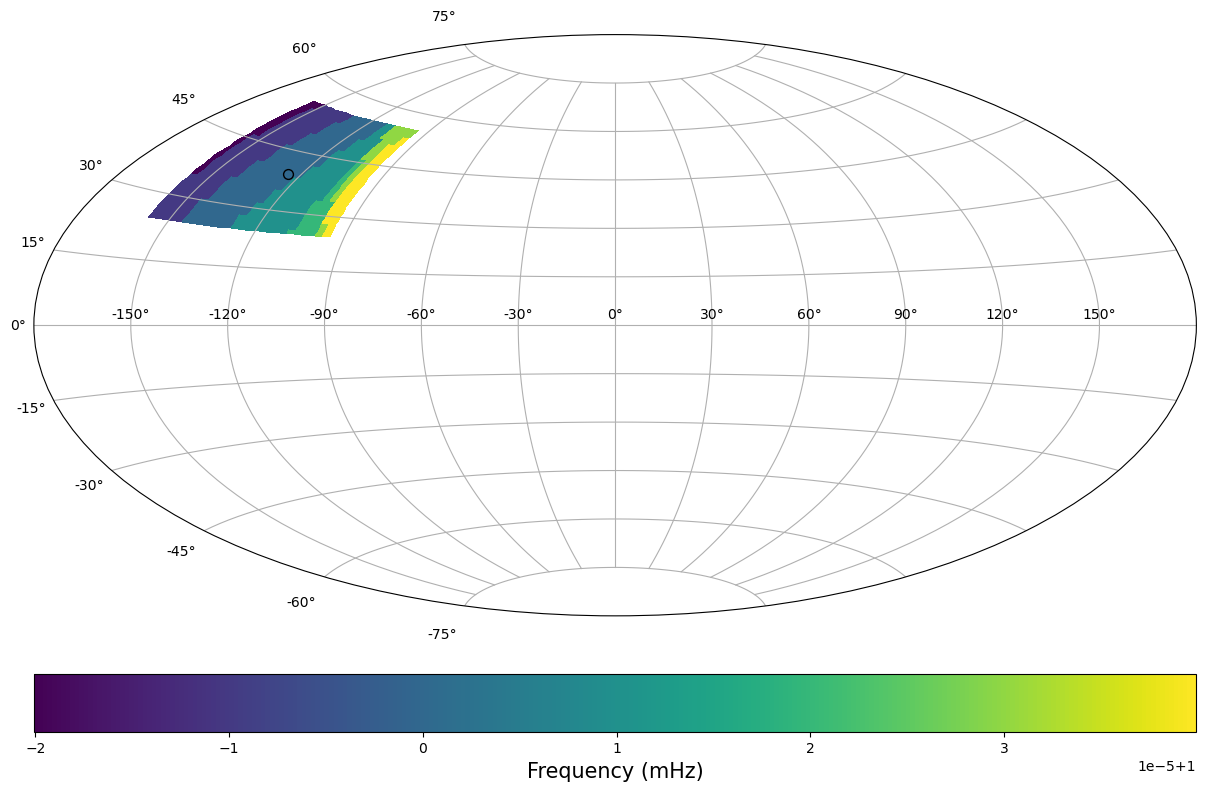

In [3]:
filename = '../grid_output/823_1_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 0.0
center_lon = 0.0
delta_fdot = 1e-14
delta_lat = 0.1256637
delta_lon = 0.25132741
detectors = b'AE'
estimator = b'mean'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.01
span_fdot = 1e-15
span_lat = 3.14159266
span_lon = 6.28318531


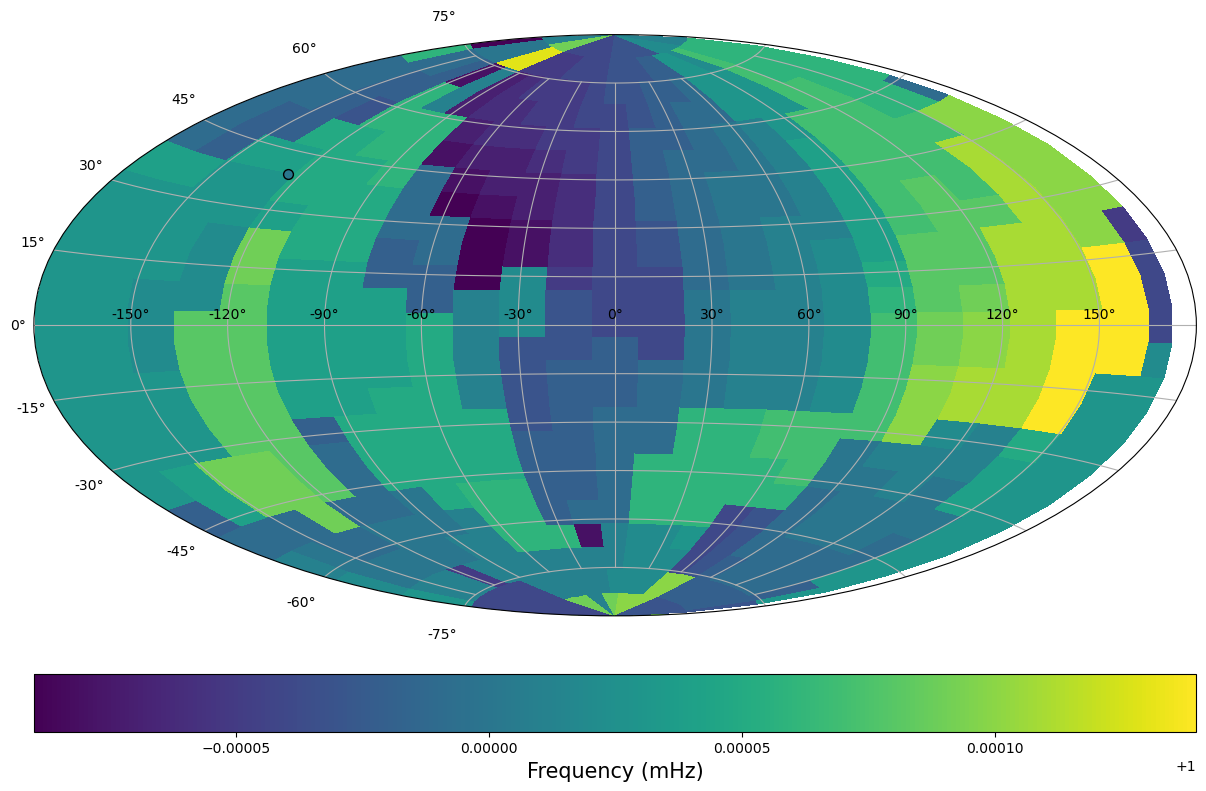

In [4]:
filename = '../grid_output/823_2_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 0.0
center_lon = 0.0
delta_fdot = 1e-14
delta_lat = 0.1256637
delta_lon = 0.25132741
detectors = b'AE'
estimator = b'median'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.01
span_fdot = 1e-15
span_lat = 3.14159266
span_lon = 6.28318531


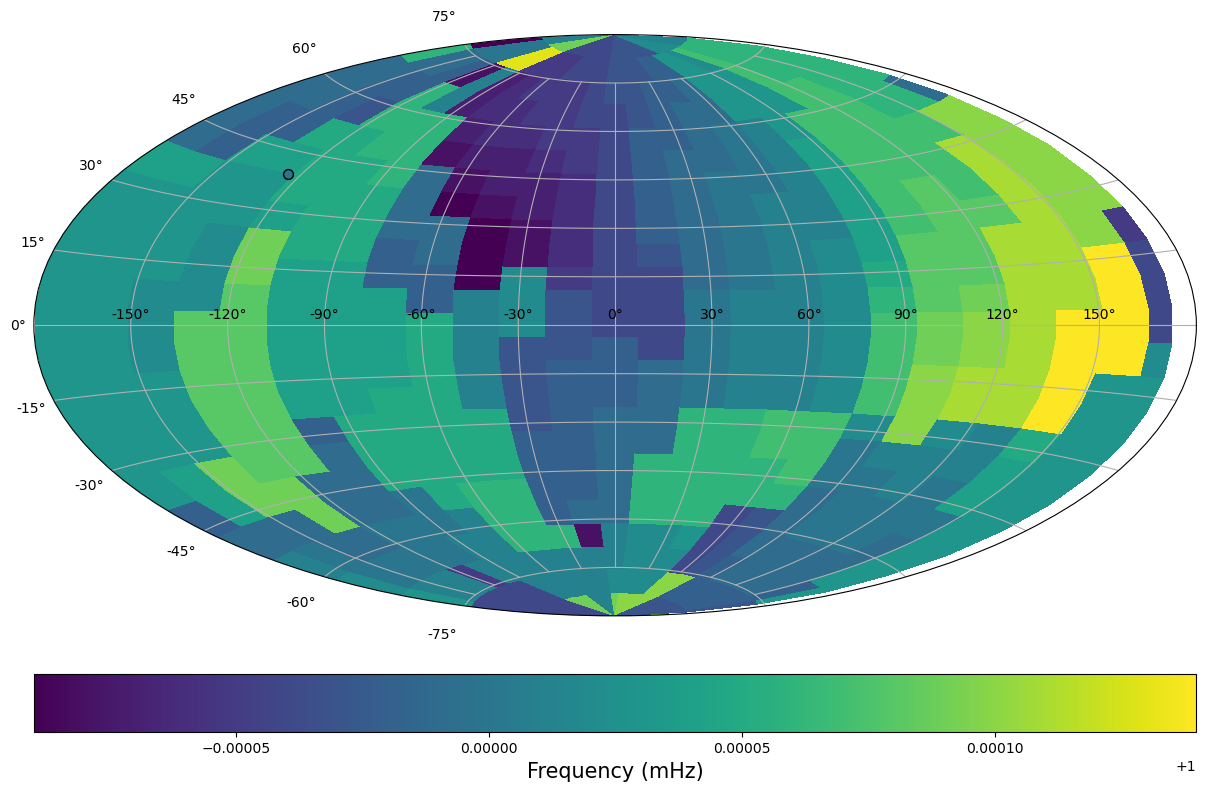

In [10]:
filename = '../grid_output/915_1_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 2.45369716
center_lon = 4.10509098
delta_fdot = 1e-14
delta_lat = 0.02094395
delta_lon = 0.0418879
detectors = b'AE'
estimator = b'mean'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.025
span_fdot = 1e-15
span_lat = 0.52359878
span_lon = 1.04719756


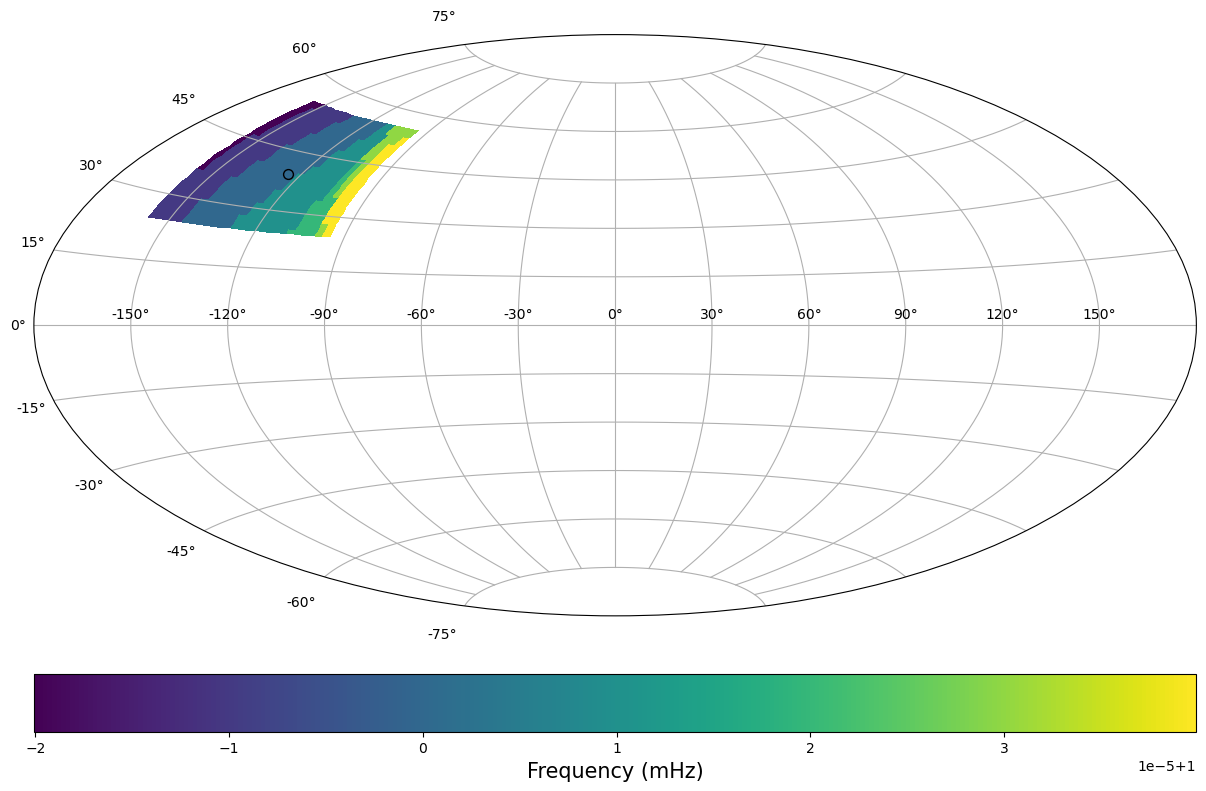

In [5]:
filename = '../grid_output/823_3_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 0.0
center_lon = 0.0
delta_fdot = 1e-14
delta_lat = 0.1256637
delta_lon = 0.25132741
detectors = b'AE'
estimator = b'mean'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.01
span_fdot = 1e-15
span_lat = 3.14159266
span_lon = 6.28318531


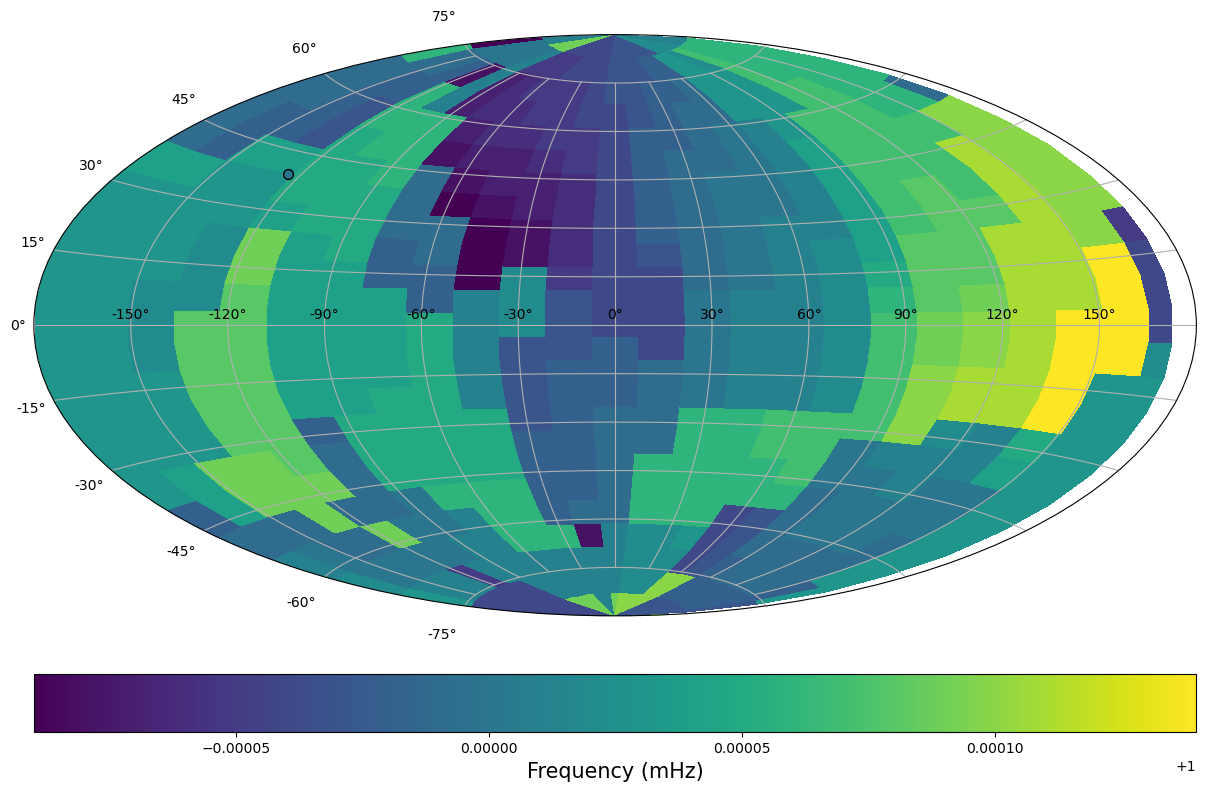

In [6]:
filename = '../grid_output/823_4_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 2.45369716
center_lon = 4.10509098
delta_fdot = 1e-14
delta_lat = 0.02094395
delta_lon = 0.0418879
detectors = b'AE'
estimator = b'mean'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.025
span_fdot = 1e-15
span_lat = 0.52359878
span_lon = 1.04719756


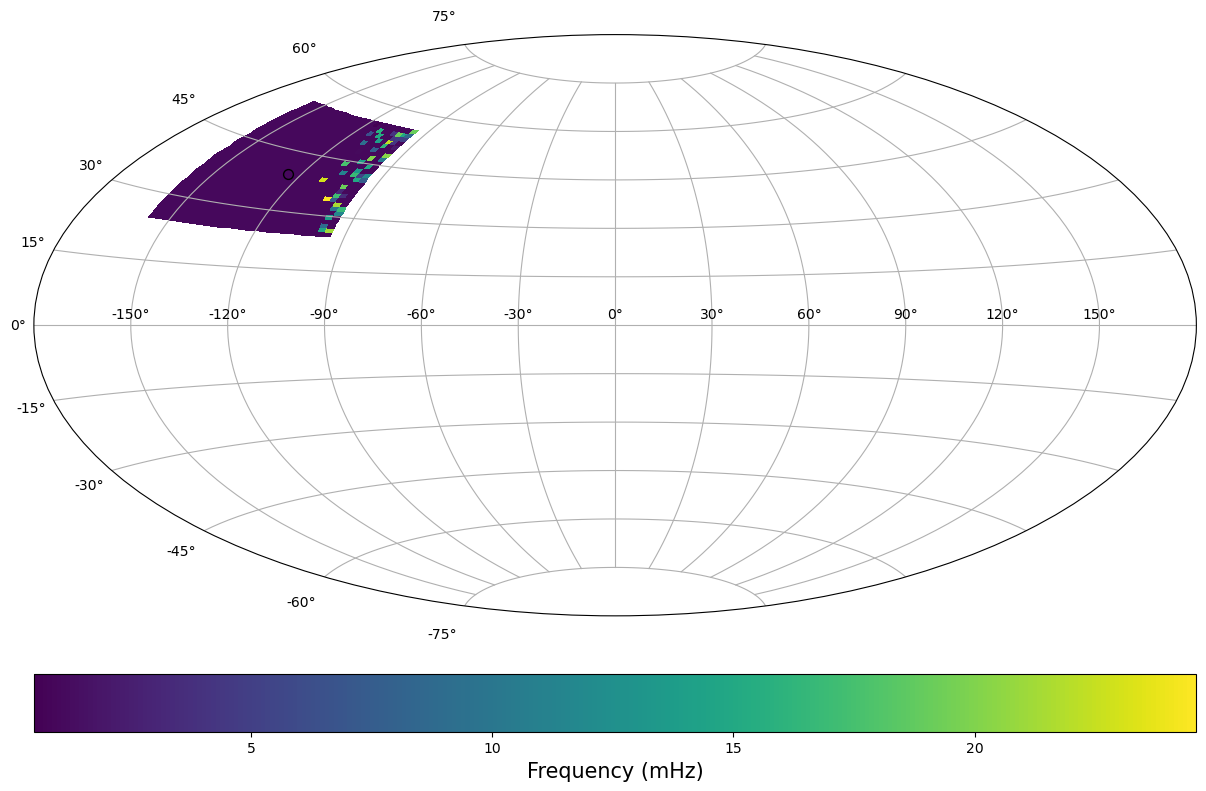

In [7]:
filename = '../grid_output/823_5_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 0.0
center_lon = 0.0
delta_fdot = 1e-14
delta_lat = 0.1256637
delta_lon = 0.25132741
detectors = b'AE'
estimator = b'mean'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.01
span_fdot = 1e-15
span_lat = 3.14159266
span_lon = 6.28318531


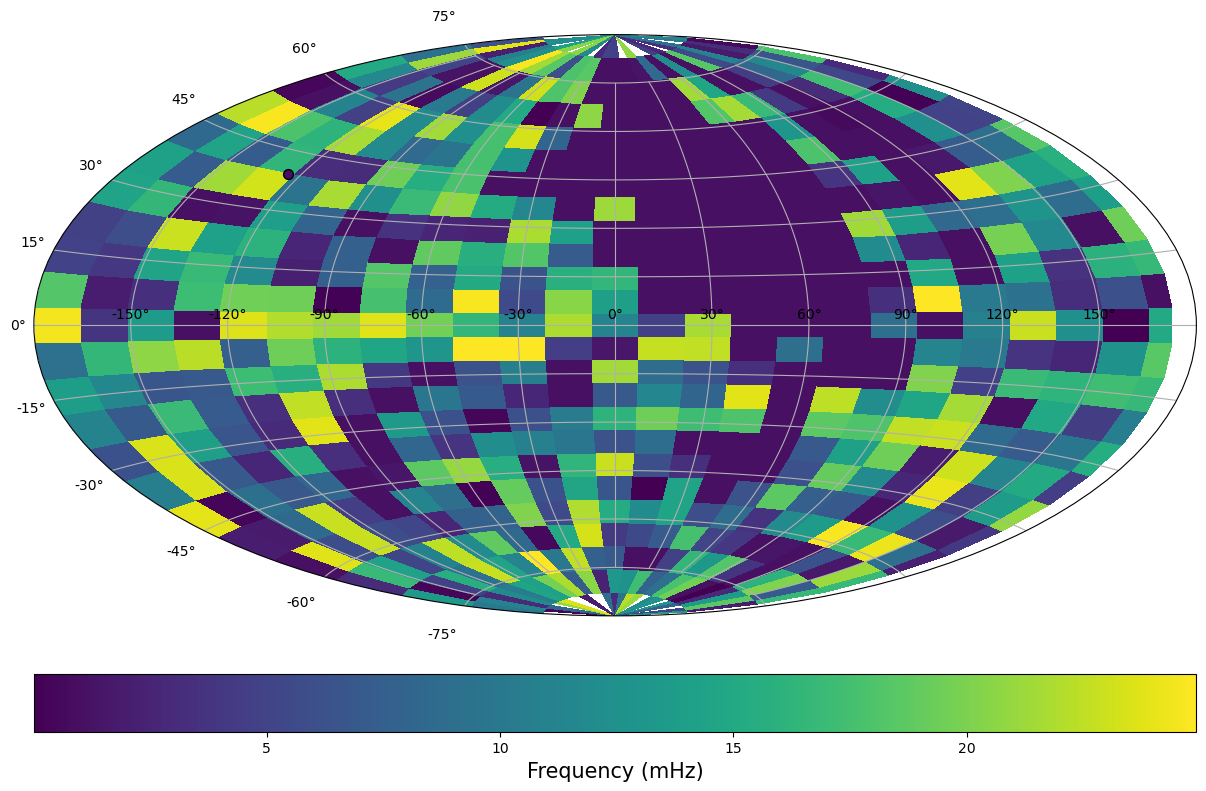

In [8]:
filename = '../grid_output/823_6_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

L = 2500000000.0
center_fdot = 0.0
center_lat = 0.0
center_lon = 0.0
delta_fdot = 1e-14
delta_lat = 0.1256637
delta_lon = 0.25132741
detectors = b'AE'
estimator = b'median'
f_max = 0.025
f_res = 1e-08
rho_threshold = 0.01
span_fdot = 1e-15
span_lat = 3.14159266
span_lon = 6.28318531


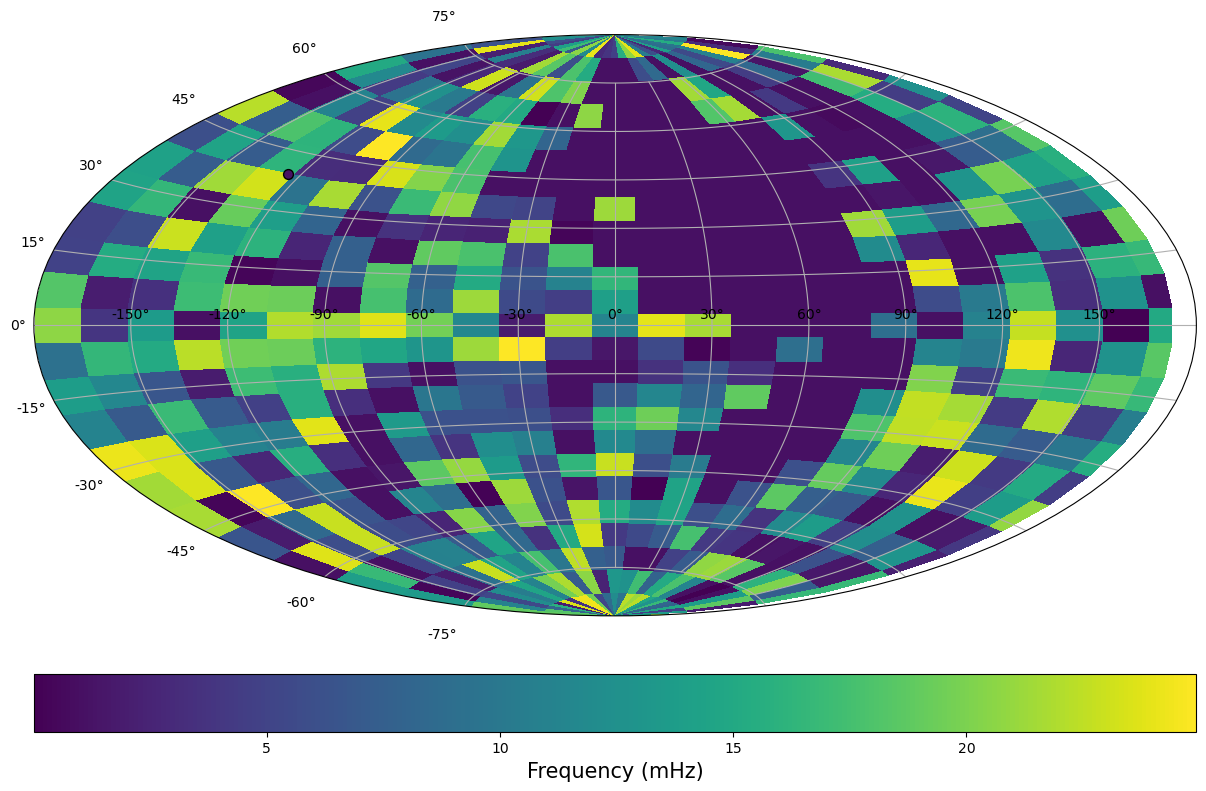

In [9]:
filename = '../grid_output/827_1_grid_output.hdf5'
filepath = Path.cwd().parent.joinpath('examples')
display_config(filepath.joinpath(filename))
sim, ver = sky_plot_data(filepath.joinpath(filename), True)
sky_plot(sim, ver, ver_size=50)

In [11]:
# Doesn't work at the moment

filename = 'LDC2_sangria_training_v2.h5'
data_file = Path.cwd().parent.joinpath('data').joinpath(filename)
ver_data = h5py.File(data_file)['sky']['vgb']['cat'][:].squeeze()
bin_freqs = 1e3*ver_data['Frequency']
for bin_name in ver_data['Name']:
    binary = ver_data[ver_data['Name'] == bin_name].squeeze()
    bin_f = 1e3*binary['Frequency']
    alt_f = np.delete(bin_freqs, np.where(bin_freqs==bin_f))
    bin_lat = binary['EclipticLatitude']
    bin_lon = wrap(binary['EclipticLongitude'])
    arg_min = np.argmin(np.sum((np.unique(sim_data[[2, 3]], axis=1).T - np.array([bin_lat, bin_lon]))**2, axis=1))
    bin_coords = np.unique(sim_data[[2, 3]], axis=1).T[arg_min]

    bin_stat = []
    for rho, f, lat, lon in sim_data.T:
        if bin_coords[0] == lat and bin_coords[1] == lon:
            bin_stat.append([1e3*f, rho])
    bin_stat = np.array(bin_stat).T
    
    f_min= np.min((bin_stat[0].min(), bin_f))
    f_max = np.max((bin_stat[0].max(), bin_f))
    rho_max = np.max(bin_stat[1])

    fig = plt.figure(figsize=(8, 6))
    plt.scatter(bin_stat[0], bin_stat[1], marker='x', s=15)
    ax = plt.gca()
    ax.set_xlim(-0.05, f_max+0.05)
    ax.set_ylim(rho_thres-0.025, rho_max+0.025)
    ax.hlines(rho_max, ax.get_xlim()[0], ax.get_xlim()[1],
              color='g', label=f'rho={rho_max:.4f}')
    ax.vlines(bin_f, ax.get_ylim()[0], ax.get_ylim()[1],
              color='r', label=f'f={bin_f:.4f} mHz')
    ax.vlines(alt_f, ax.get_ylim()[0], ax.get_ylim()[1],
              linestyles=':', linewidth=0.5, color='#777777',
              label='verification binaries')
    plt.title(f'Rho vs Frequency at closest sky location to {bin_name}')
    plt.xlabel('Frequency [mHz]')
    plt.ylabel('Rho statistic')
    plt.legend(loc='lower right')
    plt.show()

NameError: name 'wrap' is not defined